In [1]:
import os
import os.path as path
import sys

EXAMPLE_DIR = path.abspath("")
GIT_DIR = path.split(EXAMPLE_DIR)[0]
SRC_DIR = path.join(GIT_DIR, "src")
sys.path.append(SRC_DIR)


In [2]:
from models import *

In [3]:
AREA = 50
VOLUME = 5
CONFIG_FILE = f'{EXAMPLE_DIR}/config.json'

In [4]:
simulation = SimulationEnvironment(AREA, VOLUME, CONFIG_FILE)
simulation.collector_area
simulation.storage_tank_volume

5

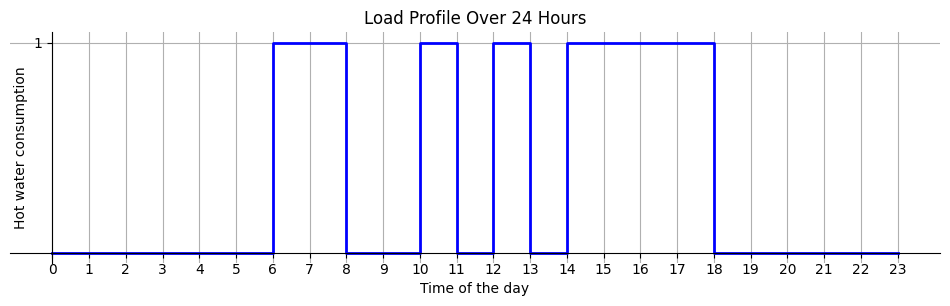

In [5]:
simulation.plot_water_consumption()

AUXILIARY ENERGY 473.463 MJ
TOTAL_ENERGY 0.000 MJ
THE SOLAR FRACTION IS: 1.000


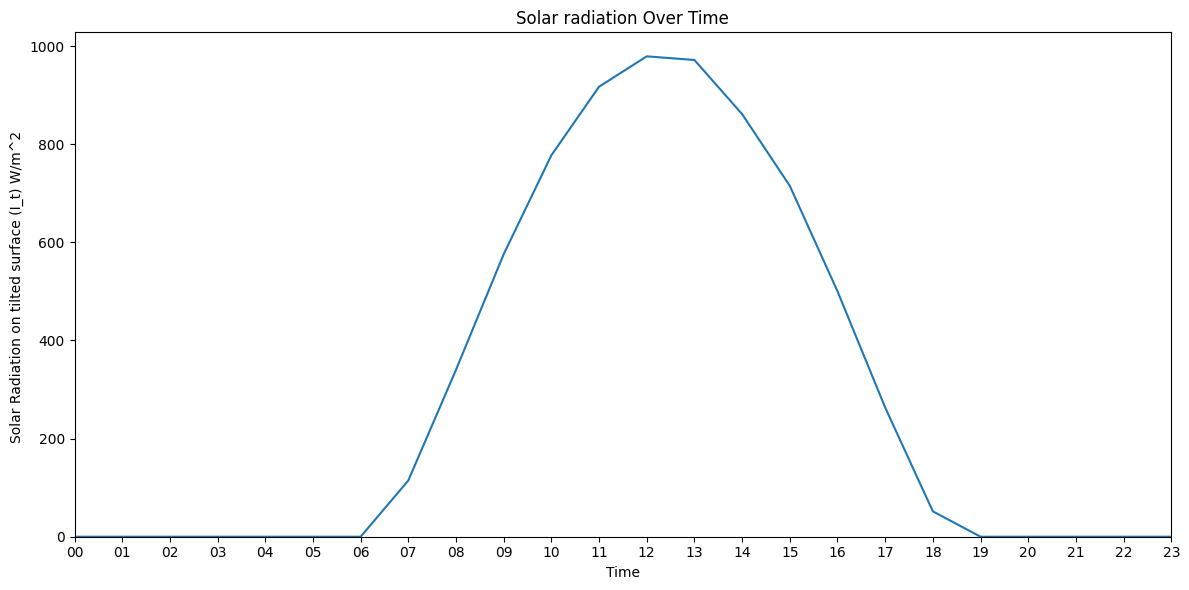

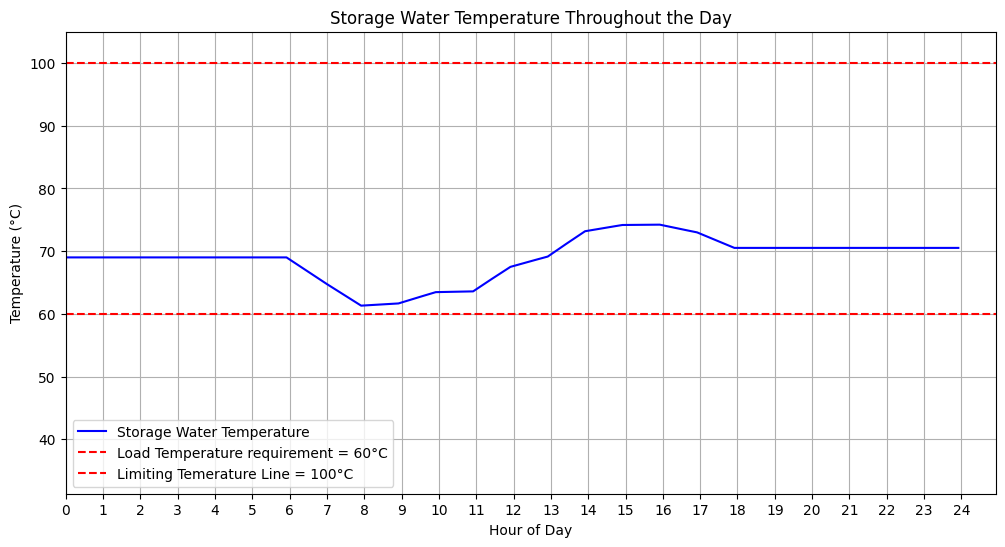

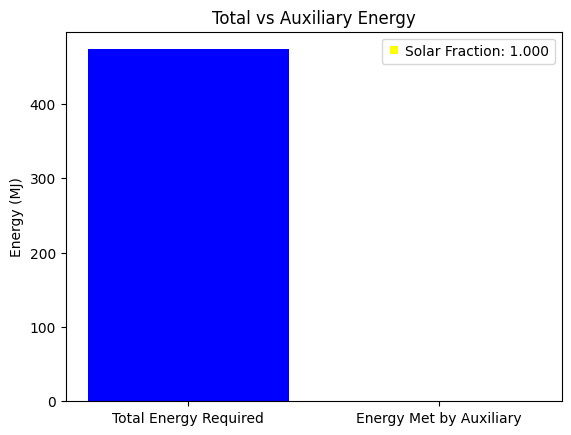

In [6]:
simulation.simulate_single_day(month=4)

AUXILIARY ENERGY 20.090 GJ
TOTAL_ENERGY 2.021 GJ
THE SOLAR FRACTION IS: 0.899


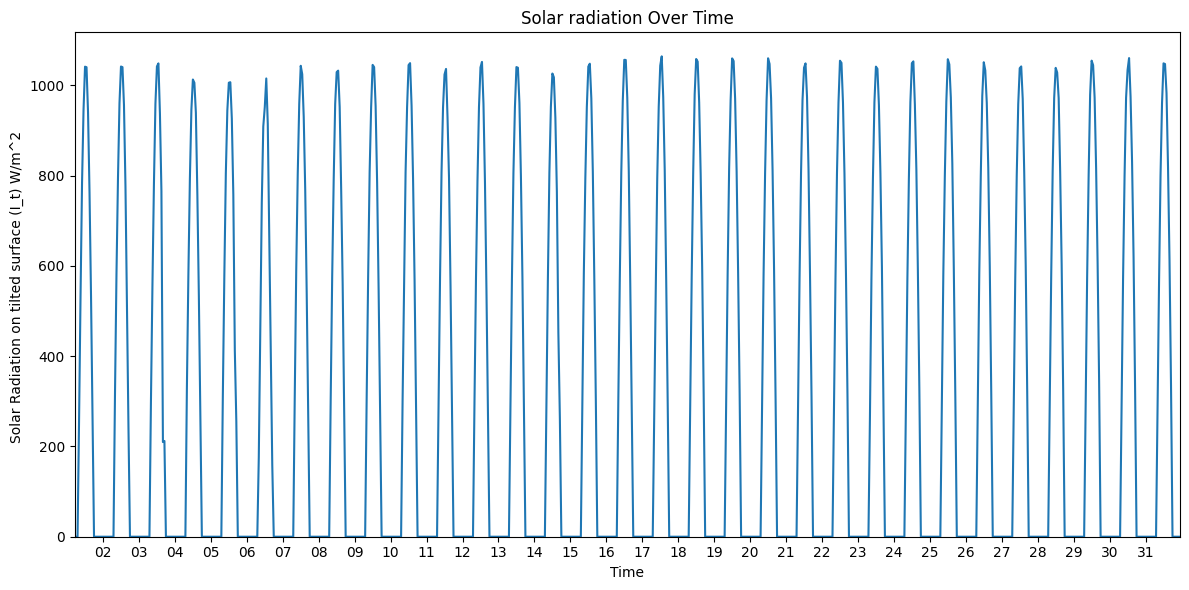

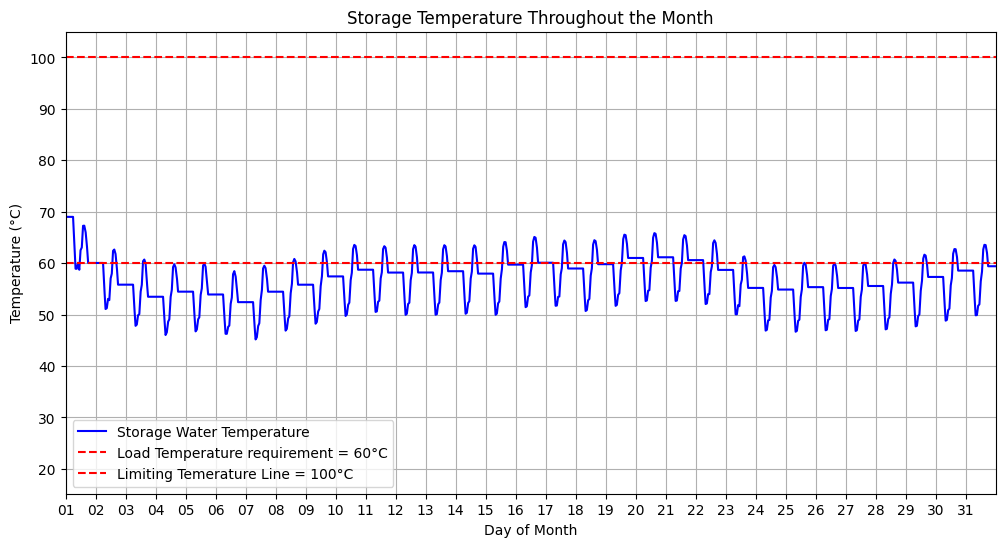

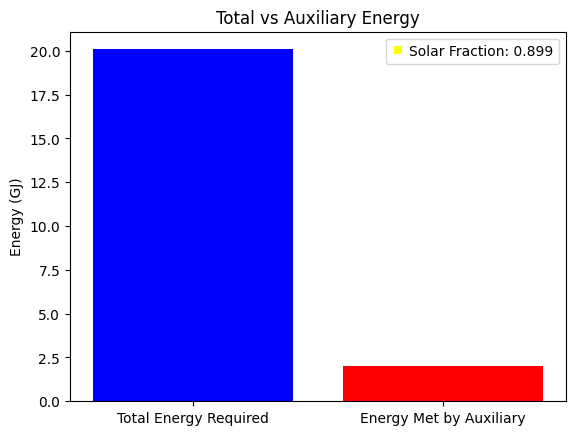

In [7]:
simulation.simulate_month(month=1)

AUXILIARY ENERGY 218.217 GJ
TOTAL_ENERGY 52.463 GJ
THE SOLAR FRACTION IS: 0.760


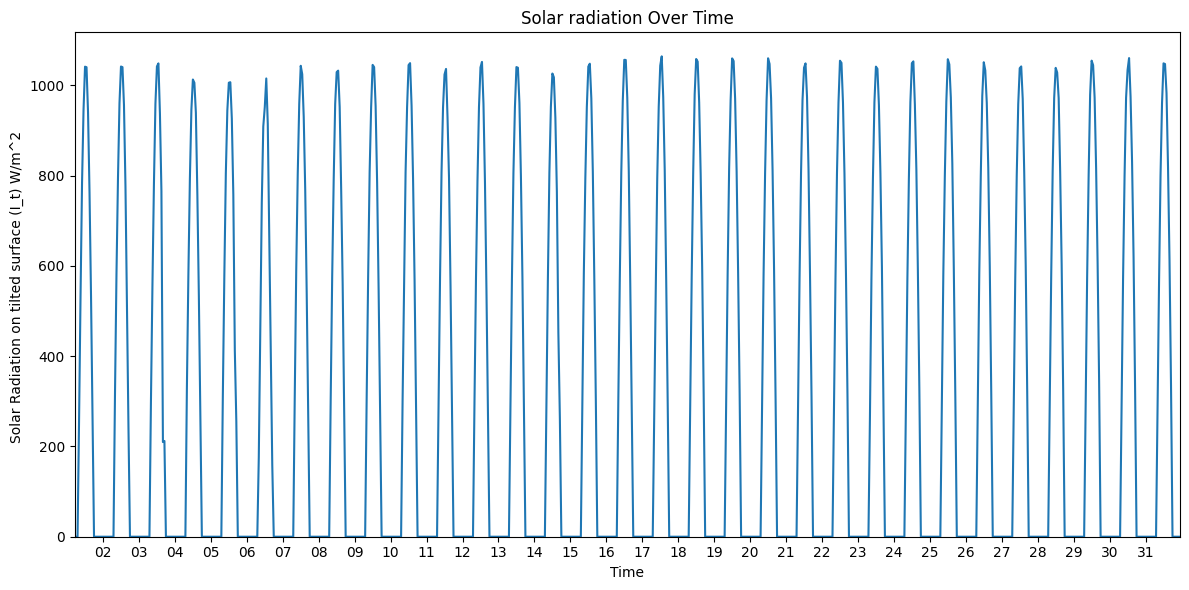

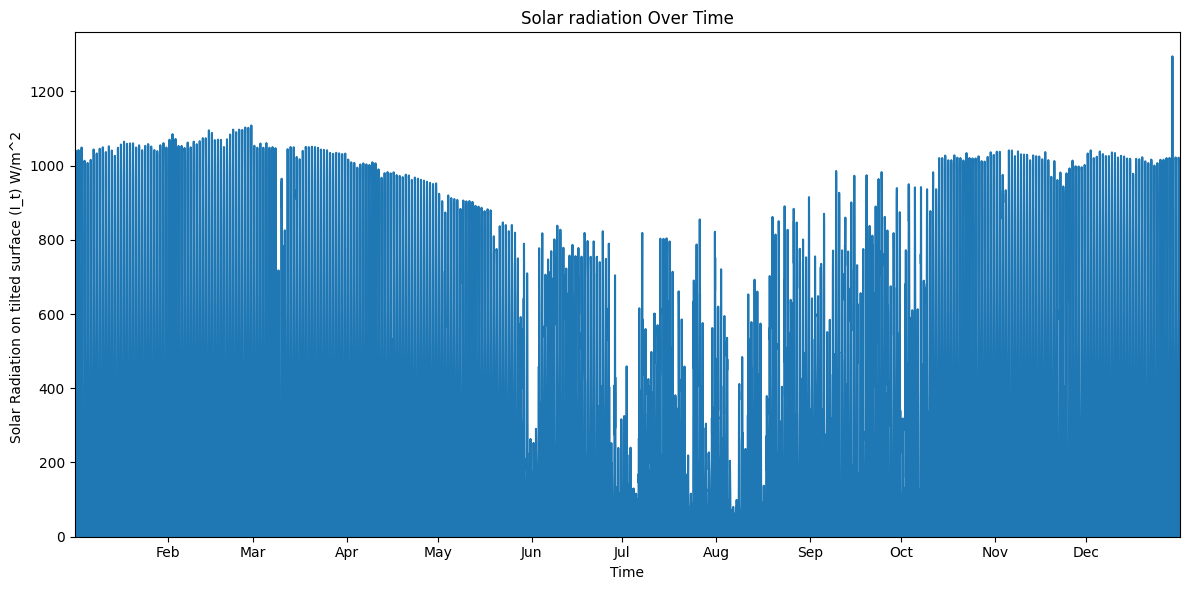

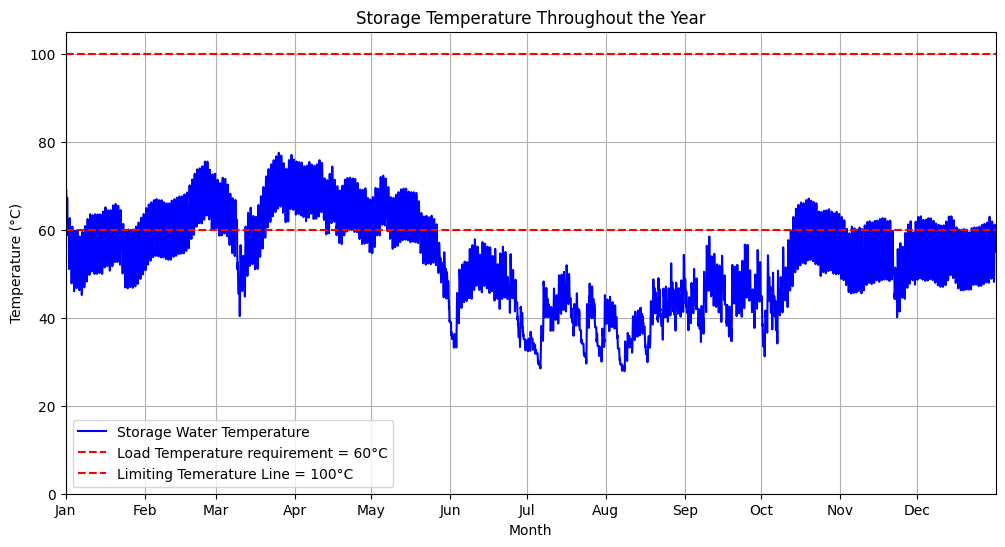

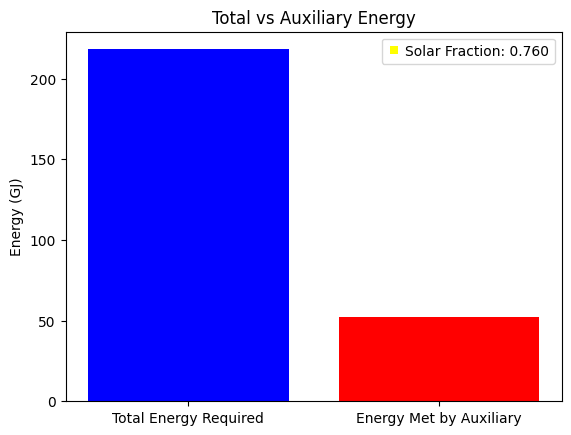

In [8]:
simulation.simulate_entire_year()

AUXILIARY ENERGY 473.463 MJ
TOTAL_ENERGY 0.000 MJ
THE SOLAR FRACTION IS: 1.000


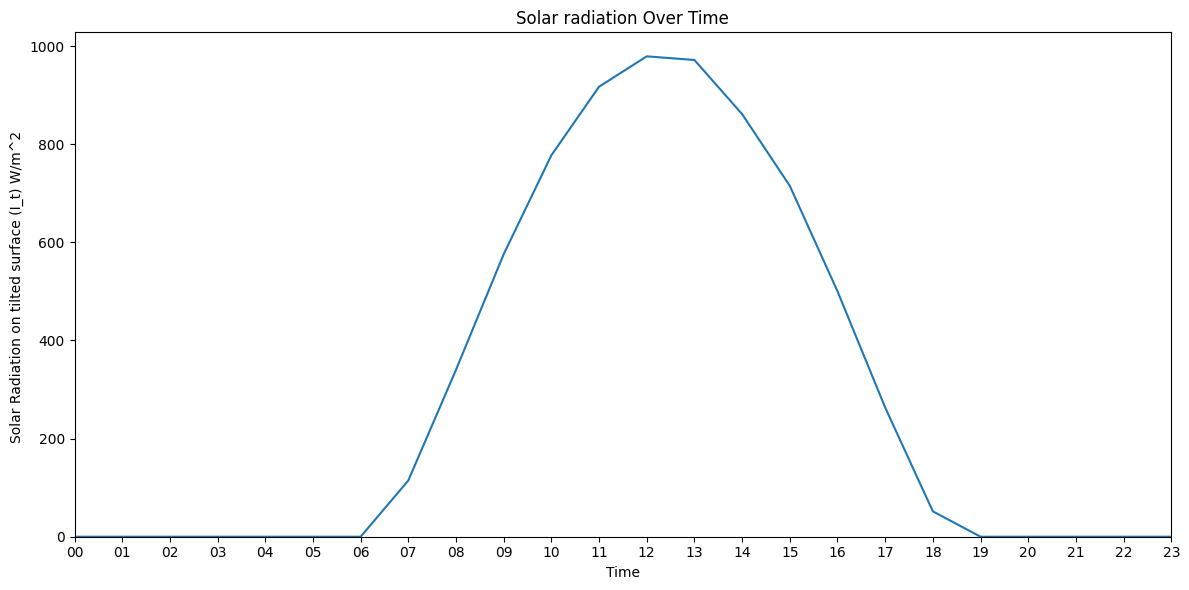

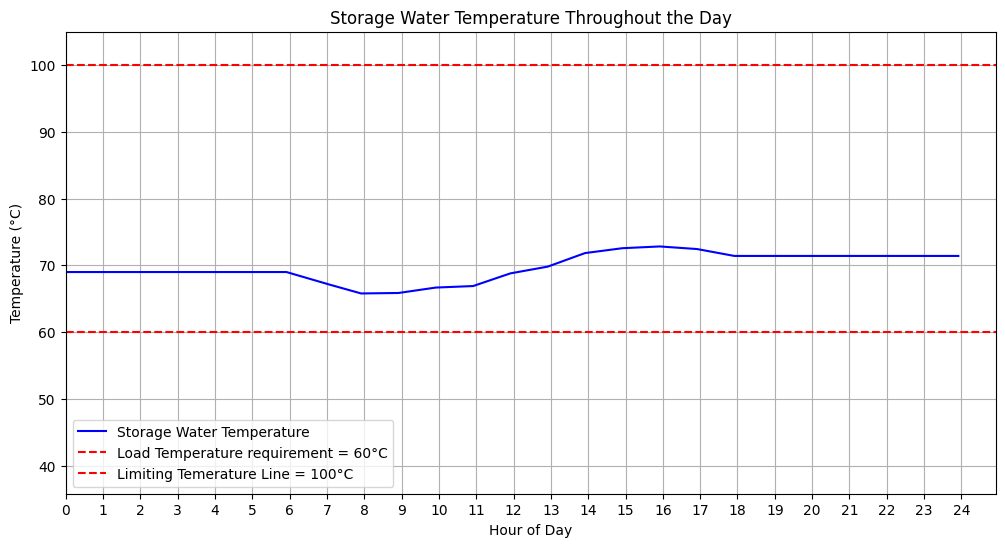

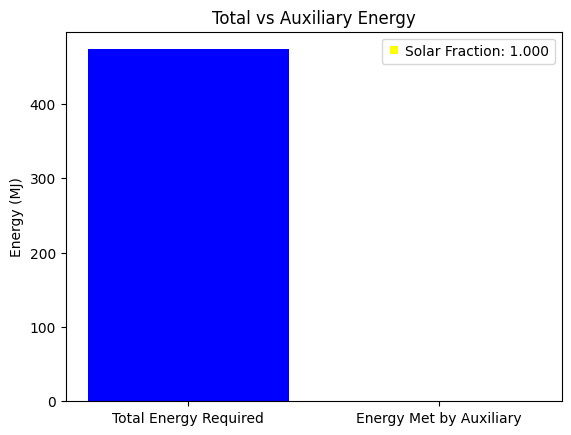

In [9]:
simulation.collector_area = 60
simulation.storage_tank_volume = 12
simulation.simulate_single_day(month=4)


AUXILIARY ENERGY 19.140 GJ
TOTAL_ENERGY 2.010 GJ
THE SOLAR FRACTION IS: 0.895


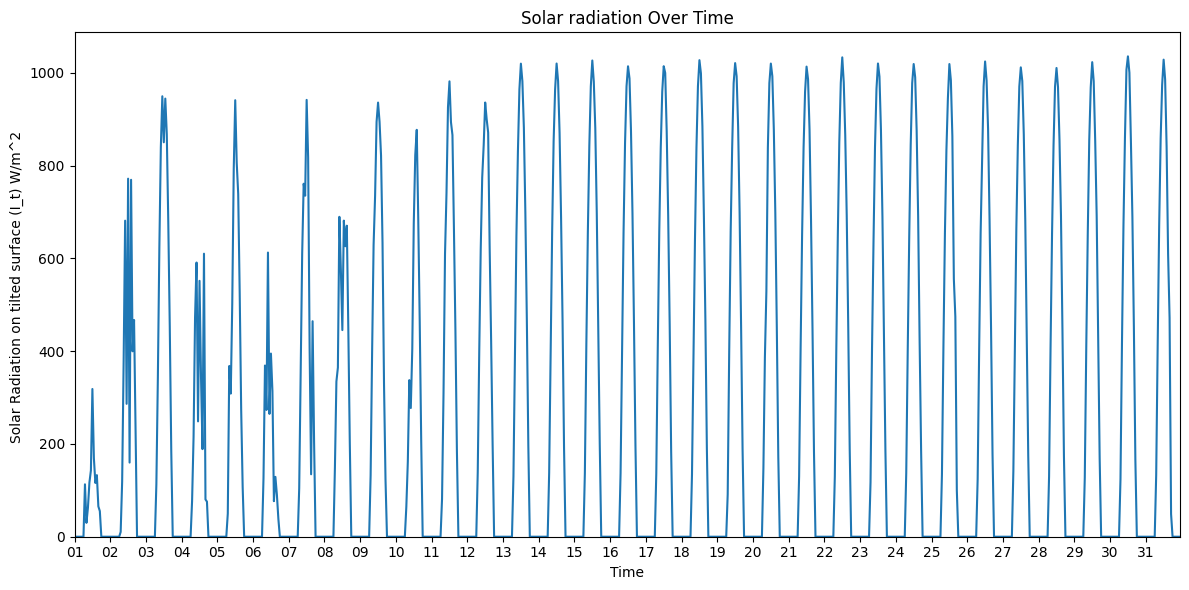

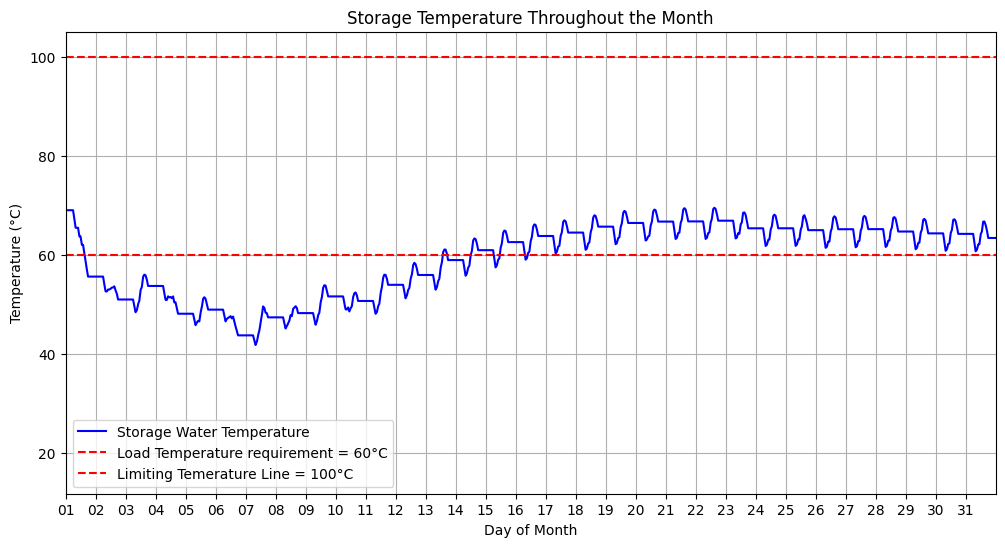

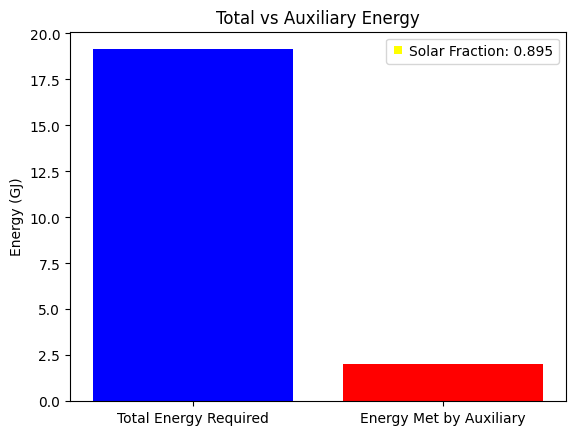

SimulationParameters(A_c=60, V_st=12, F_r_tao_alpha=0.675, F_r_U_l=5.656, m_l_dot=0.1559375, C_p=4180, T_l=60, rho=998, consumption_pattern=[{'start': '06:00', 'end': '08:00'}, {'start': '10:00', 'end': '11:00'}, {'start': '12:00', 'end': '13:00'}, {'start': '14:00', 'end': '18:00'}], U_st=0.19999520011519725, A_st=16.184438181008215, environment_conditions=                     poa_global  solar_elevation  temp_air  wind_speed  Int
time                                                                       
2006-01-01 05:00:00        0.00             0.00     13.82        4.03    0
2006-01-01 06:00:00        0.00             0.00     14.85        3.88    0
2006-01-01 07:00:00        0.00             1.33     15.88        3.72    1
2006-01-01 08:00:00      254.01            13.93     16.91        3.57    0
2006-01-01 09:00:00      532.72            25.69     19.91        3.94    0
...                         ...              ...       ...         ...  ...
2007-01-01 00:00:00        0.00 

In [10]:
simulation.simulate_month(10)
simulation.simulation_params

AUXILIARY ENERGY 218.217 GJ
TOTAL_ENERGY 38.838 GJ
THE SOLAR FRACTION IS: 0.822


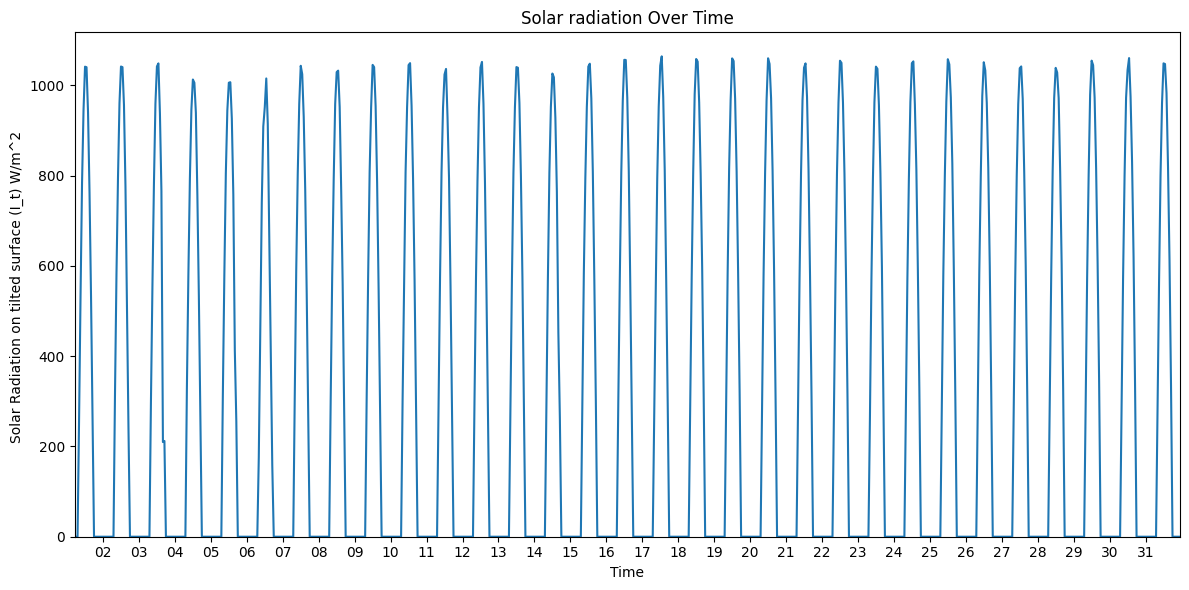

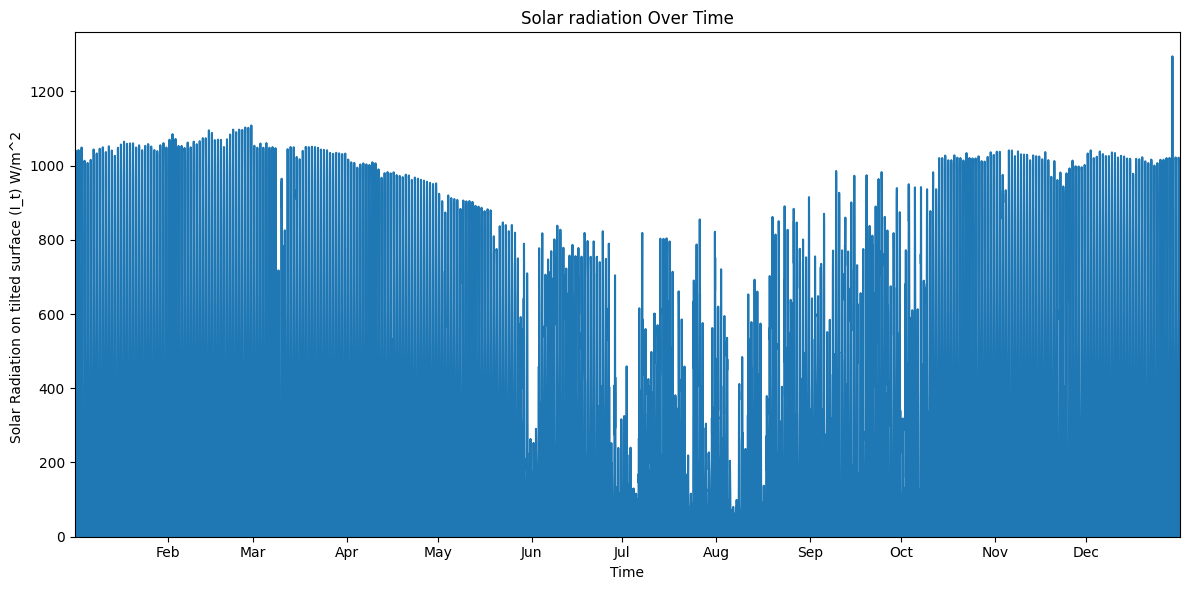

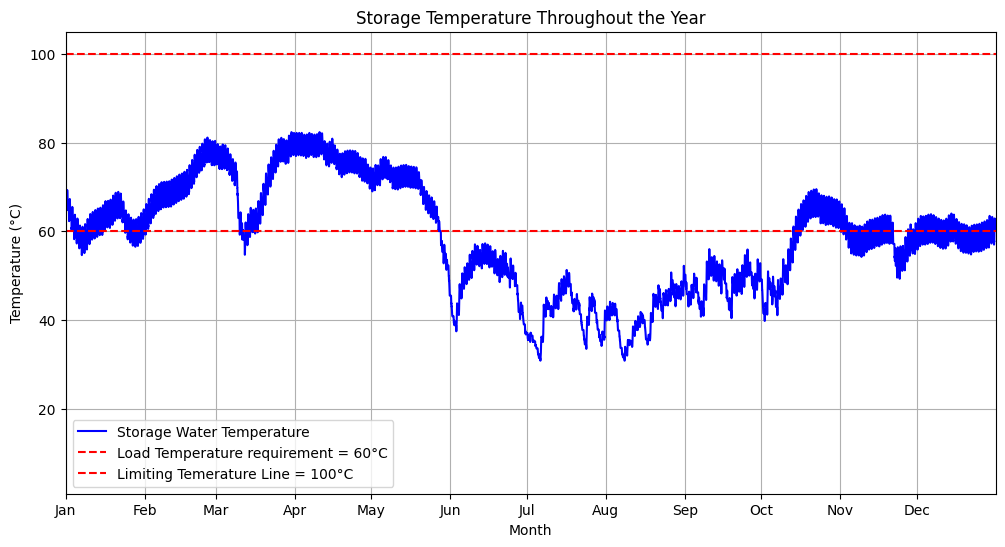

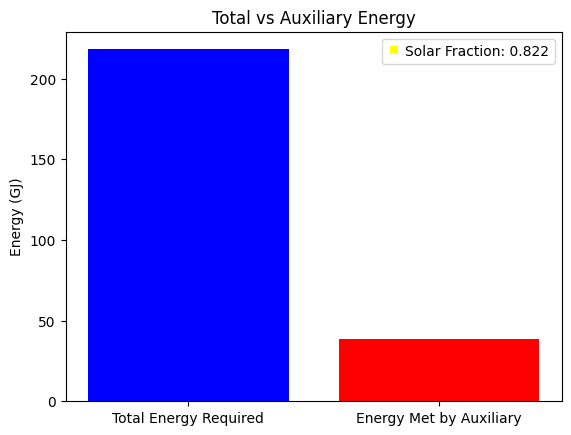

In [11]:
simulation.simulate_entire_year()

In [12]:
import math

x = math.exp(-(0.2 * 20 * 300)/ (998 * 4180 * 5))

In [13]:
x

0.9999424703242915